In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

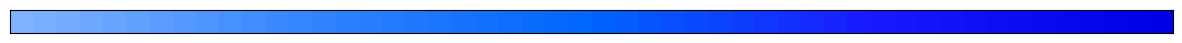

In [10]:
IMAGES_PATH = '.'
df_data = pd.read_csv('../data/agent_history_10mb.csv')
title_prefix = '10MB database'
step = 50


def make_Ramp(ramp_colors):
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list('my_list', [Color(c1).rgb for c1 in ramp_colors])
    plt.figure(figsize=(15, 3))
    plt.imshow([list(np.arange(0, len(ramp_colors), 0.1))], interpolation='nearest', origin='lower', cmap=color_ramp)
    plt.xticks([])
    plt.yticks([])
    return color_ramp


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# custom_cmap = make_Ramp(['#005ce6', '#069AF3', '#66ccff', '#ffbf80', '#ffa64d', '#ff7f0e', '#ffbb33'])
custom_cmap = make_Ramp(['#80b3ff', '#3385ff', '#0066ff', '#1a1aff', '#0000e6'])


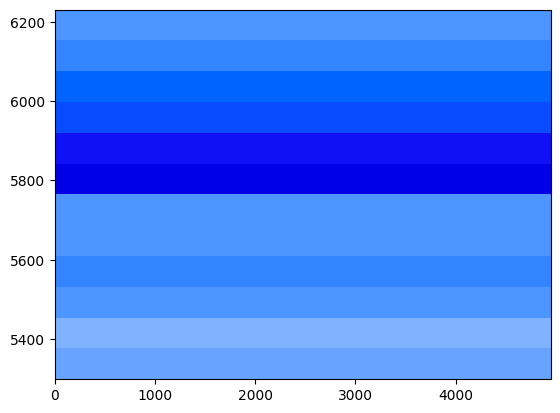

In [11]:
hist, x, y, _ = plt.hist2d(df_data[::step].index, df_data[::step]['initial_state_reward'], bins=(1, 12),
                           cmap=custom_cmap)
hist = [0.0, *hist[0], 0.0]
hist_intervals = pd.IntervalIndex.from_arrays(np.insert(y, 0, 0, axis=0),
                                              np.insert(y, y.size, np.inf, axis=0),
                                              closed='left')
df_data['hist'] = df_data['reward'].apply(
    lambda r: hist[hist_intervals.get_loc(r)] / (df_data.index.max() / step) * 100)

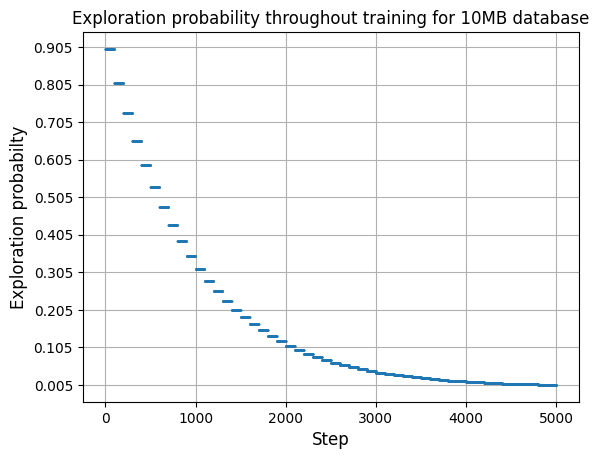

In [12]:
# exploration_probability
plt.grid()
plt.yticks(np.arange(min(df_data['exploration_probability']), max(df_data['exploration_probability']) + 1, 0.1))
plt.ylabel('Exploration probabilty', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Exploration probability throughout training for {title_prefix}')

plt.plot(df_data['exploration_probability'], '.', markersize=1)
#save_fig(f'{title_prefix}exploration_probability', fig_extension='svg')

Saving figure 10MB database_total_reward


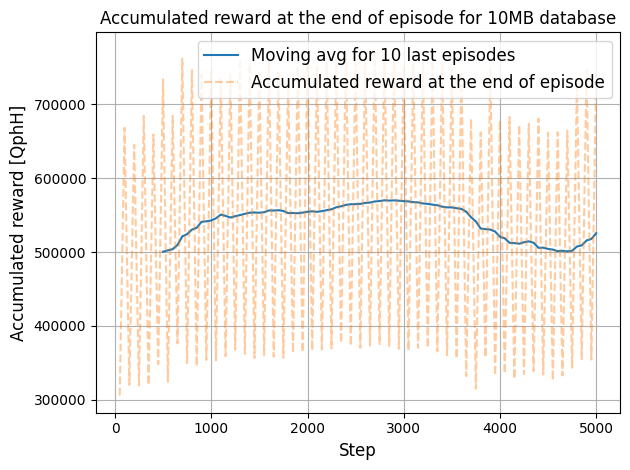

In [13]:
# total_reward
rolling_probe = step / 5

plt.grid()
plt.ylabel('Accumulated reward [QphH]', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Accumulated reward at the end of episode for {title_prefix}')

plt.plot(df_data['total_reward'][step - 1::step].rolling(window=int(rolling_probe)).mean(), '-',
         label=f'Moving avg for {int(rolling_probe)} last episodes')
plt.plot(df_data['total_reward'][step - 1::step], '--', alpha=0.4,
         label='Accumulated reward at the end of episode')
plt.legend(fontsize=12)
save_fig(f'{title_prefix}_total_reward', fig_extension='svg')

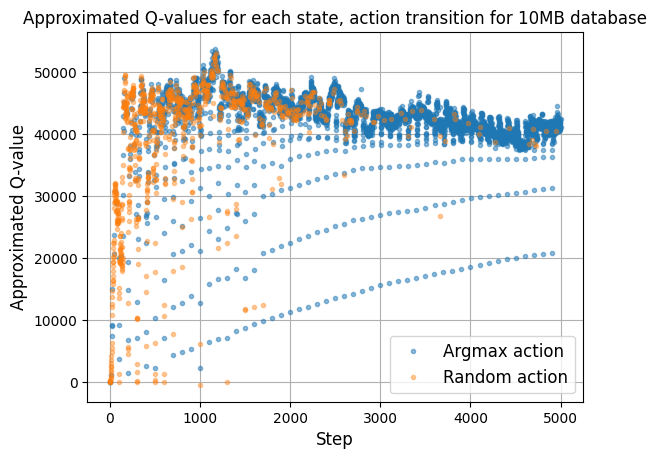

In [14]:
# aprox q
plt.grid()
plt.ylabel('Approximated Q-value', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Approximated Q-values for each state, action transition for {title_prefix}')

plt.plot(df_data[df_data['random_action'] == False]['q'], '.', alpha=0.5,
         label='Argmax action')
plt.plot(df_data[df_data['random_action'] == True]['q'], '.', alpha=0.4,
         label='Random action')
plt.legend(loc='lower right', fontsize=12)
#save_fig(f'{title_prefix}_qvalue', fig_extension='svg')

Saving figure 10MB database_td_error


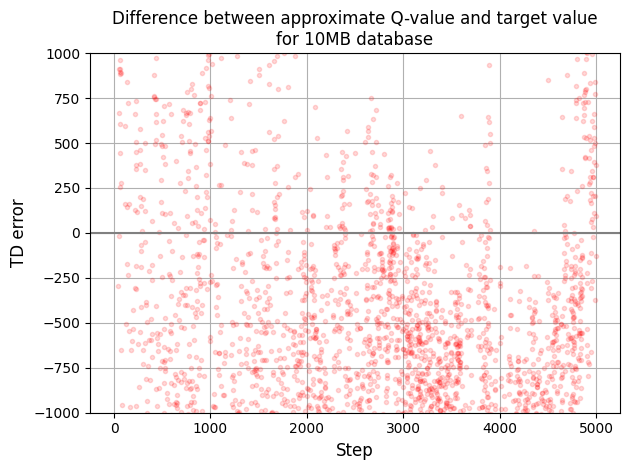

In [15]:
# td error
plt.grid()
plt.ylabel('TD error', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Difference between approximate Q-value and target value\nfor {title_prefix}')

plt.plot(df_data['td_error'], 'r.', alpha=0.15)
plt.axhline(y=0, color='grey')
plt.ylim([-1000, 1000])
save_fig(f'{title_prefix}_td_error', fig_extension='svg')

AttributeError: 'Colorbar' object has no attribute 'draw_all'

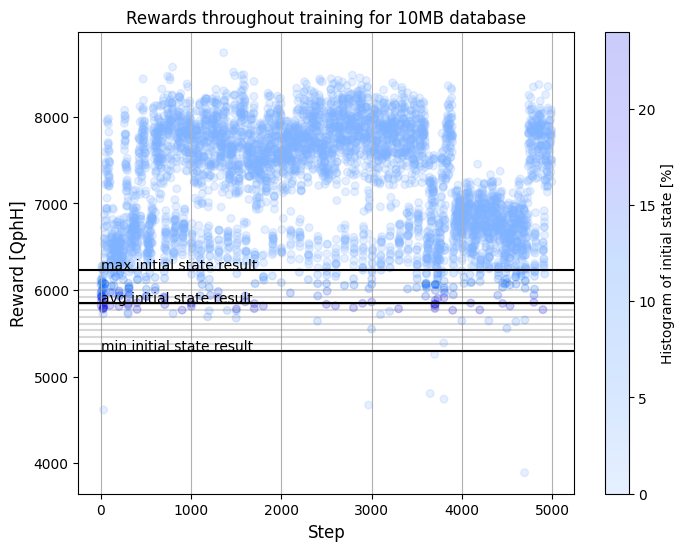

In [16]:
from matplotlib.pyplot import colorbar

# rewards

plt.figure(figsize=(8, 6))
plt.grid(axis='x')
for yc in y[:-2]:
    plt.axhline(y=yc, color='grey', alpha=0.3)
plt.ylabel('Reward [QphH]', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Rewards throughout training for {title_prefix}')

plt.axhline(df_data['initial_state_reward'].mean(), color = 'black')
plt.axhline(df_data['initial_state_reward'].max(), color = 'black')
plt.axhline(df_data['initial_state_reward'].min(), color = 'black')
plt.annotate('avg initial state result', xy=(0, df_data['initial_state_reward'].mean() + 5))
plt.annotate('max initial state result', xy=(0, df_data['initial_state_reward'].max() + 5))
plt.annotate('min initial state result', xy=(0, df_data['initial_state_reward'].min() + 5))

plt.scatter(x=df_data.index, y=df_data['reward'], alpha=0.2, s=30, c=df_data['hist'], cmap=custom_cmap)
color_bar = colorbar(label='Histogram of initial state [%]')
color_bar.set_alpha(1)
color_bar.draw_all()

save_fig(f'{title_prefix}_reward', fig_extension='svg')


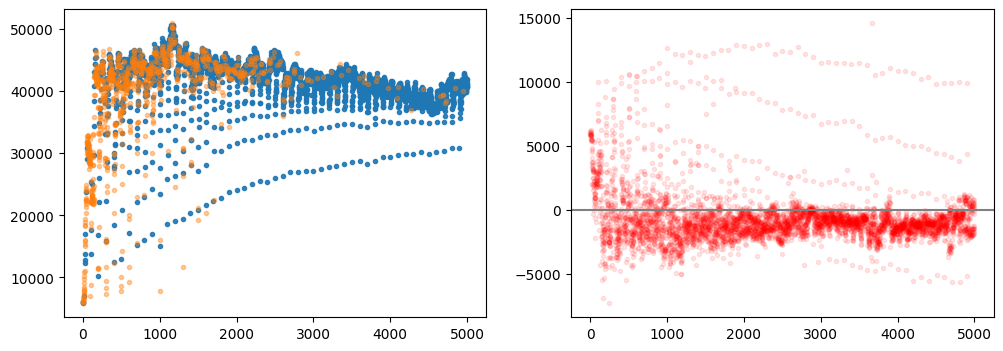

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
# plt.plot(df_data['max_q'].rolling(window=step).mean(), '-')
plt.plot(df_data[df_data['random_action'] == False]['td_target'], '.', alpha=0.9)
plt.plot(df_data[df_data['random_action'] == True]['td_target'], '.', alpha=0.4)
plt.subplot(122)
plt.plot(df_data['td_error'], 'r.', alpha=0.1)
plt.axhline(y=0, color='grey')


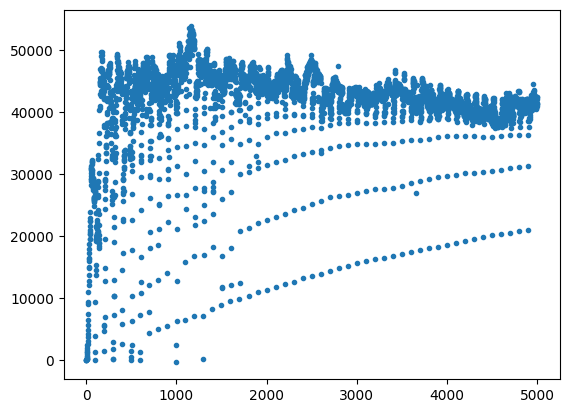

In [ ]:
plt.plot(df_data['q'], '.')

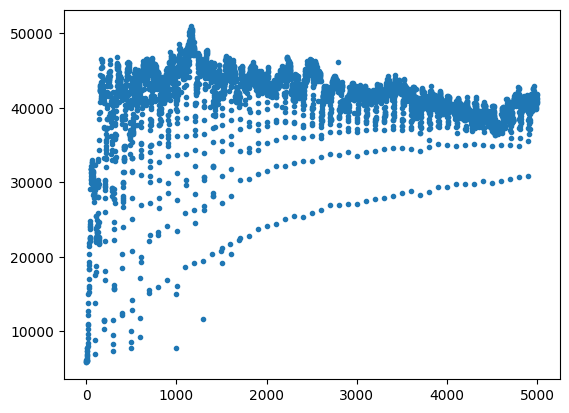

In [ ]:
plt.plot(df_data['td_target'][::], '.')

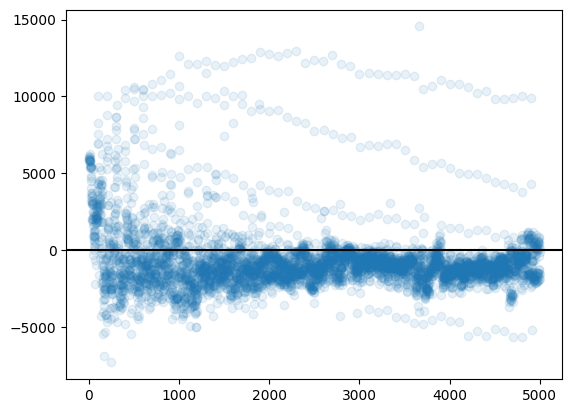

In [ ]:
plt.plot(df_data['td_error'], 'o', alpha=0.1)
plt.axhline(y=0, color='black')

In [ ]:
df_mean = df_data.groupby(['next_state']).mean()['reward'].rename('mean')
df_count = df_data.groupby(['next_state']).count()['reward'].rename('count')
df_min = df_data.groupby(['next_state']).min()['reward'].rename('min')
df_max = df_data.groupby(['next_state']).max()['reward'].rename('max')
df_std = df_data.groupby(['next_state']).std()['reward'].rename('std')
df_state = pd.concat([df_count, df_mean, df_min, df_max, df_std], axis=1)
df_state.sort_values(by='std', inplace=True)
df_state.to_csv('./state_raport.csv')
df_state.describe()

TypeError: agg function failed [how->mean,dtype->object]